In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).


### Load Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, TimeDistributed, GRU
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import json
import os
import re


In [3]:
project_path = '/content/drive/My Drive/Colab Notebooks/Deep Learning/Sarcasm Detection'
df = pd.read_json('/content/drive/My Drive/Colab Notebooks/Deep Learning/Sarcasm Detection/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset

In [4]:
#One column dropped
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

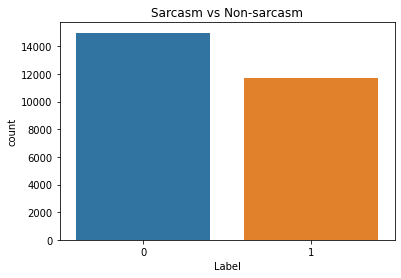

In [5]:
#Checking the distribution between labels
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

### Get length of each headline and add a column for that

In [6]:
#Exploring Data
#df.info()
#df.tail()
#df.describe()
#df.head()

df['headline_length'] = df['headline'].apply(len)
df.head()

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [7]:
#Defining Parameters
max_features = 10000  
maxlen = 25
embedding_size = 200

### Appling `tensorflow.keras` Tokenizer and get indices for words
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [8]:
# Filtering headlines so that only valid headlines remain
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)

### Padding sequences

In [9]:
X_padded = sequence.pad_sequences(X, maxlen=maxlen)

In [10]:
Y = df['is_sarcastic']
X_train, X_test, y_train, y_test= train_test_split(X_padded, Y, train_size=0.67)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17895, 25)
(8814, 25)
(17895,)
(8814,)


### Vocab mapping
- There is no word for 0th index

In [13]:
#Getting word index
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'be': 21,
 'how': 22,
 'out': 23,
 'it': 24,
 'that': 25,
 'as': 26,
 'up': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'what': 31,
 'his': 32,
 'he': 33,
 'just': 34,
 'who': 35,
 'us': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'all': 40,
 'report': 41,
 'into': 42,
 'one': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'says': 49,
 'woman': 50,
 'can': 51,
 'day': 52,
 'its': 53,
 'time': 54,
 'no': 55,
 'first': 56,
 'like': 57,
 'get': 58,
 'her': 59,
 'trumps': 60,
 'people': 61,
 'an': 62,
 'i': 63,
 'now': 64,
 'obama': 65,
 'house': 66,
 'off': 67,
 'life': 68,
 'make': 69,
 'still': 70,
 'women': 71,
 'was': 72,
 'than': 73,
 'my': 74,
 'white': 75,
 'we': 76,
 'back': 77,
 'clinton': 78,
 'down': 79,
 'if': 80,
 'when': 81,
 

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [14]:
# Setting Vocabulary size
num_words = len(tokenizer.word_index) + 1
print(num_words)

28399


### Load Glove Word Embeddings

In [15]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

path_to_glove_file = '/content/glove.6B.200d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


### Create embedding matrix

In [16]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model


In [18]:
model = Sequential()
model.add(Embedding(num_words,200,input_length=maxlen))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

### Compile the model

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 200)           5679800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25, 200)           240800    
_________________________________________________________________
dense_2 (Dense)              (None, 25, 32)            6432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 32)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 25, 1)             33        
Total params: 5,927,065
Trainable params: 5,927,065
Non-trainable params: 0
_________________________________________________________________
None


### Fit the model

In [20]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
560/560 [==============================] - 42s 75ms/step - loss: 0.4352 - accuracy: 0.7991
Epoch 2/5
560/560 [==============================] - 42s 75ms/step - loss: 0.2453 - accuracy: 0.9076
Epoch 3/5
560/560 [==============================] - 42s 75ms/step - loss: 0.1545 - accuracy: 0.9460
Epoch 4/5
560/560 [==============================] - 42s 76ms/step - loss: 0.0890 - accuracy: 0.9694
Epoch 5/5
560/560 [==============================] - 42s 75ms/step - loss: 0.0623 - accuracy: 0.9771


In [21]:
scores, accuracy = model.evaluate(X_test,y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 0.7915
Accuracy: 0.8413


The Accuracy is 84%.
And Score is 79%

Trying for better accuracy with layer mods

In [43]:
model_1 = Sequential()
model_1.add(Embedding(num_words,200,input_length=maxlen))
model_1.add(Bidirectional(LSTM(100,return_sequences=True)))
model_1.add(GRU(64))
model_1.add(Dense(64, activation="relu"))
#model_1.add(TimeDistributed(Dense(100, activation='relu')))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation="sigmoid"))

In [44]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
print(model_1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 25, 200)           5679800   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 25, 200)           240800    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                51072     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 5,975,897
Trainable params: 5,975,897
Non-trainable params: 0
____________________________________________

In [45]:
model_1.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
560/560 [==============================] - 47s 83ms/step - loss: 0.4205 - accuracy: 0.8030
Epoch 2/5
560/560 [==============================] - 46s 83ms/step - loss: 0.1976 - accuracy: 0.9255
Epoch 3/5
560/560 [==============================] - 46s 83ms/step - loss: 0.0962 - accuracy: 0.9666
Epoch 4/5
560/560 [==============================] - 46s 83ms/step - loss: 0.0461 - accuracy: 0.9842
Epoch 5/5
560/560 [==============================] - 46s 83ms/step - loss: 0.0287 - accuracy: 0.9903


In [46]:
scores_1, accuracy_1 = model_1.evaluate(X_test,y_test, verbose=0)
print("Score: {:.4f}".format(scores_1))
print("Accuracy: {:.4f}".format(accuracy_1))

Score: 0.9271
Accuracy: 0.8302


SyntaxError: ignored